In this assignment, we will be using  the Fashion MNIST dataset, which has 10 classes, we’ll treat it as a custom dataset by selecting only 3 classes from it (e.g., "T-shirt/top", "Trouser", and "Pullover"). Each of these classes has 6,000 training images and 1,000 test images, which fits your requirement of 3,000 images per class .

Plan to be followed:


1. Select 3 classes from Fashion MNIST.

2. Subsample 3,000 images per class for training and 500 per class for validation/test.

3. Design a CNN architecture to achieve over 95% accuracy.

4. Train and evaluate the model.

Note :  The dataset used can be directly accessed from Tensorflow





In [2]:
#Install required packages
!pip install tensorflow matplotlib numpy

In [3]:
!pip install scipy

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models, applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
import os

Consider the fashion dataset for claasifying images

In [1]:
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential

# importing various types of hidden layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Adam optimizer for better LR and less loss
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

Data Analysis
In the data analysis, we will see the number of images available, the dimensions of each image, etc. We will then split the data into training and testing.

The fashion MNIST dataset consists of 60,000 images for the training set and 10,000 images for the testing set. Each image is a 28 x 28 size grayscale image categorized into ten different classes.

Each image has a label associated with it. There are, in total, ten labels available, and they are:

T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot

In [17]:
# Split the data into training and testing
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Print the dimensions of the dataset
print('Train: X = ', x_train.shape)
print('Test: X = ', x_test.shape)




Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


Data visualization
Now we will see some of the sample images from the fashion MNIST dataset. For this, we will use the library matplotlib to show our np array data in the form of plots of images.

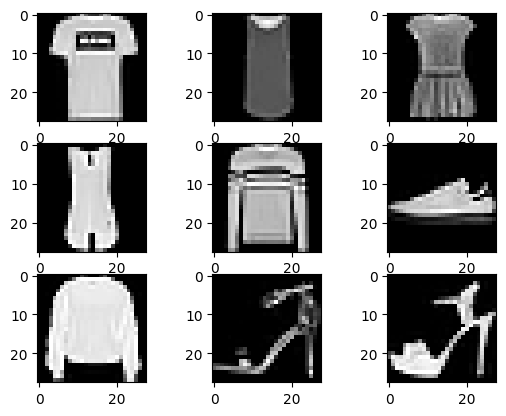

In [18]:
for i in range(1, 10):
	# Create a 3x3 grid and place the
	# image in ith position of grid
	plt.subplot(3, 3, i)
	# Insert ith image with the color map 'grap'
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

# Display the entire plot
plt.show()


Step 1 : Select 3 classes from Fashion MNIST.

In [19]:
# Filter for classes: 0 (T-shirt/top), 1 (Trouser), 2 (Pullover)
selected_classes = [0, 1, 2]

def filter_classes(x, y, classes, samples_per_class):
    x_filtered, y_filtered = [], []
    for cls in classes:
        idx = np.where(y == cls)[0][:samples_per_class]
        x_filtered.append(x[idx])
        y_filtered.append(y[idx])
    return np.concatenate(x_filtered), np.concatenate(y_filtered)

Step 2 : Subsample 3,000 images per class for training and 500 per class for validation/test.

In [23]:
# Import tensorflow
import tensorflow as tf

# Use 3000 samples/class for train, 500/class for test
x_train_filtered, y_train_filtered = filter_classes(x_train, y_train, selected_classes, 3000)
x_test_filtered, y_test_filtered = filter_classes(x_test, y_test, selected_classes, 500)
# Normalize and reshape
x_train_filtered = x_train_filtered / 255.0
x_test_filtered = x_test_filtered / 255.0

x_train_filtered = np.expand_dims(x_train_filtered, -1)
x_test_filtered = np.expand_dims(x_test_filtered, -1)

# Convert labels to 0, 1, 2
label_map = {cls: i for i, cls in enumerate(selected_classes)}
y_train_filtered = np.array([label_map[y] for y in y_train_filtered])
y_test_filtered = np.array([label_map[y] for y in y_test_filtered])

# One-hot encode
y_train_onehot = tf.keras.utils.to_categorical(y_train_filtered, 3)
y_test_onehot = tf.keras.utils.to_categorical(y_test_filtered, 3)

Design a CNN architecture to achieve over 95% accuracy.

In [24]:
# CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Once the model architecture is defined, we will compile and build the model.We use Adam optimizers in most CNN architectures because it is very efficient on larger problems and helps us achieve correct weights and learning rates with minimum loss.

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,131 (875.51 KB)

 Trainable params: 224,131 (875.51 KB)

 Non-trainable params: 0 (0.00 B)

Once all the model parameters are set, the model is ready to be trained. We will train the model for ten epochs, with each epoch having 64 steps.

In [26]:
# Train the model
history = model.fit(x_train_filtered, y_train_onehot, epochs=10, batch_size=64,
                    validation_data=(x_test_filtered, y_test_onehot))

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.8914 - loss: 0.3496 - val_accuracy: 0.9633 - val_loss: 0.1205
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.9707 - loss: 0.0947 - val_accuracy: 0.9707 - val_loss: 0.0968
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.9704 - loss: 0.0862 - val_accuracy: 0.9720 - val_loss: 0.0869
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.9761 - loss: 0.0759 - val_accuracy: 0.9773 - val_loss: 0.0763
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.9802 - loss: 0.0601 - val_accuracy: 0.9733 - val_loss: 0.0785
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.9810 - loss: 0.0548 - val_accuracy: 0.9760 - val_loss: 0.0757
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.9816 - loss: 0.0522 - val_accuracy: 0.9767 - val_loss: 0.0684
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.9848 - loss: 0.0432 - val_ac

In [28]:
#save the model
model.save_weights('.weights.h5', overwrite=True)

In [32]:
#Evaluate the model
test_loss, test_acc = model.evaluate(x_test_filtered, y_test_onehot)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9743 - loss: 0.0791

Test Accuracy: 97.87%


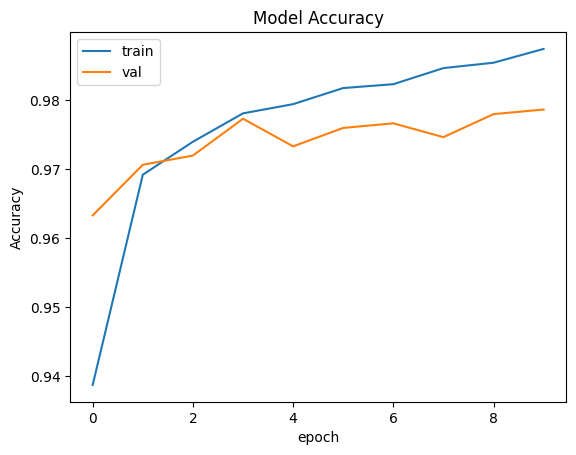

In [30]:
#Model Analysis

# Accuracy vs Epoch plot
plt.plot(history.history['accuracy']) # Changed from 'sparse_categorical_accuracy' to 'accuracy'
plt.plot(history.history['val_accuracy']) # Changed from 'val_sparse_categorical_accuracy' to 'val_accuracy'
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


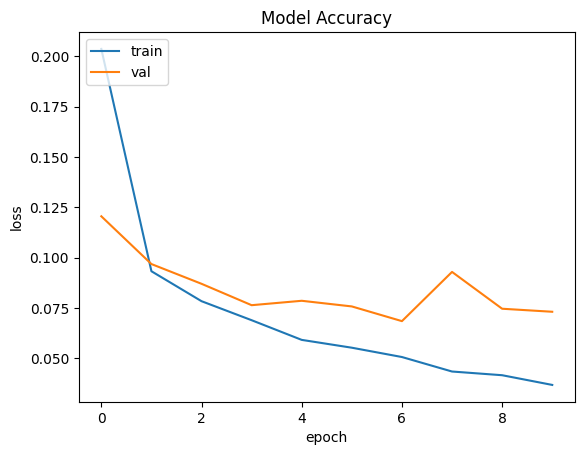

In [31]:
# Loss vs Epoch plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


To make the predictions call the predict() function on the model and pass the image into it. To perform the prediction, we will first create a list of labels in order of the corresponding output layer of the CNN. The predict() function will return the list of values of probabilities that the current input belongs probably belongs to which class. Then by using the argmax(), we will find the highest value and then output the correct label.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
pullover


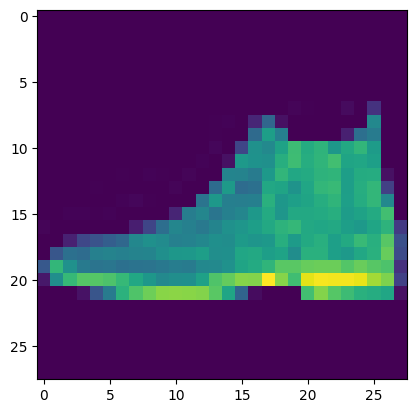

In [33]:
# There are 10 output labels for the Fashion MNIST dataset
labels = ['t_shirt', 'trouser', 'pullover']
# Make a prediction
predictions = model.predict(testX[:1])
label = labels[np.argmax(predictions)]

print(label)
plt.imshow(testX[:1][0])
plt.show()


Hence we have successfully performed image classification on the fashion MNIST dataset.

